# Searching for and Finding Pulsars

## Goals

In this activity you will work with real data, going through the steps to find and identify an otherwise unknown pulsar.  You will examine the radio frequency interference present during the observation, as well as the time and Fourier domain representations of the data.  Using programs from the PRESTO software suite, you will identify candidate pulsars, fold them, and ultimately find the real pulsar.  You will then extract a pulse time of arrival from the folded candidate.

## Introduction

Searching for pulsars is a computationally demanding and time consuming task.  You will be going through a simplified version of this process to illustrate the key steps, which are:

1) Identify and remove radio frequency interference (RFI).

2) Remove (partially) the effects of the interstellar medium (ISM) through the process of de-dispersion and create a time-series at a number of trial dispersion measures (DM).

3) Fourier transform the time-series.

4) Search for statistically significant signals in the Fourier-transformed data.  This may involve searching for pulsars that are accelerating due to their presence in a binary system.

5) Filter the candidate pulsars.

6) Fold the most promising candidates.

7) Inspect the results and decide which candidates are worthy of follow-up.

You will be using some pre-existing software to gain a better understanding of each step.  The data you will analyze comes from the Green Bank North Celestial Cap pulsar survey and is known to contain a pulsar.  Once you have successfully identified the pulsar you will extract a pulse time of arrival from the observation.

**Important Note:** Commands that begin with `!` should be run in a terminal in your VNC session.


## Dealing with RFI

RFI is to radio astronomers what light pollution is to optical astronomers.  To mitigate RFI, radio observatories are typically built in relatively remote locations and have, at the very least, on-site control of radio emitting electronics.  However, all sorts of electronics emit radio waves, so completely eliminating RFI is not possible.

Various software tools and advanced techniques have been developed to mitigate the effects of RFI in data.  You will explore an RFI mask made using the program rfifind.  Because rfifind takes a long time to run, you will simply be inspecting one of the output files: a graphic representation of the RFI mask.

This mask is made by executing the following command (all one line):

rfifind -o guppi_55366_GBNCC16246_0087_0001 -time 2.0 guppi_55366_GBNCC16246_0087_0001.fits

The -o option specifies the base of the output file name, the -time options specifies the time-domain block size (more on this during the discussion) and the last argument is the name of the file we want to analyze.

### Your task: Open the RFI mask image file.

Look at the visual representation of the mask.

![guppi_55366_GBNCC16246_0087_0001_rfifind001.png](guppi_55366_GBNCC16246_0087_0001_rfifind001.png)
![guppi_55366_GBNCC16246_0087_0001_rfifind002.png](guppi_55366_GBNCC16246_0087_0001_rfifind002.png)


Now take five minutes to try to identify anything on the plot you might be familiar with.  For example, examine the axes of the various plots and !the information at the top of the page.  Look for astronomical or mathematical terms that you might be familiar with, even if they appear out of context.  Circle or otherwise highlight these terms, and use the space below to take some notes.  Don’t worry if a lot of this looks confusing!  After five minutes we will discuss what these plots show as a group and answer questions.

## Dispersion and De-dispersion

Radio waves, like all electromagnetic radiation, travel at the speed of light, c, in a vacuum.  But space is not a vacuum.  Rather, it contains a low-density medium called the interstellar medium (when referring to the space between stars in galaxies), which is in part an ionized plasma.  As the radio waves emitted by pulsars travel through this ionized plasma, they move with a speed less than c, thus arriving at the Earth later than they would had they traveled through a true vacuum.  Furthermore, the amount that they slow down depends on the radio frequency, so that signals at a relatively high frequency travel faster than signals at a lower frequency.  This is known as dispersion, and the difference in travel time between radiation emitted at two different radio frequencies is known as the dispersion delay.

The formula for calculating the dispersion delay between two frequencies is

$$\Delta t = \frac{e^2}{2 \pi m_{\rm e} c} \times \left( \frac{1}{f_1^2} - \frac{1}{f_2^2} \right) \times \mathrm{DM}$$

where $e$ is the electron charge, $m_{\rm e}$ is the electron mass, $f_1$ and $f_2$ are the lower and higher radio frequencies, and DM is the dispersion measure.

The dispersion measure is a combination of the number density of electrons encountered by the radio signal and the distance traveled.  Expressed mathematically it is defined as

$$ \mathrm{DM} = \int\limits_0^d{n_{\rm e} dl} $$

where $n_{\rm e}$ is the electron number density, $d$ is the distance to the source of the radio waves, and the integral is taken over the path between the source and the observer, $l$ (you may recognize this as a line integral, and the DM as a column density).  The units for DM are parsecs (an astronomical unit of distance) per cubic centimeter, or $\mathrm{pc\; cm^{-3}}$.

If we plug in values for all the physical constants, and assume that $f_1$ and $f_2$ are in units of MHz and that DM is in units of $\mathrm{pc\; cm^{-3}}$, then the dispersion delay equation simplifies to:

$$ \Delta t = 4.15 \times 10^6\; \mathrm{ms} \times \left(\frac{1}{f_1^2} - \frac{1}{f_2^2} \right) \times \mathrm{DM} $$

Why does all this matter?  Suppose a pulsar emits a broadband signal, meaning that the signal is emitted at a range of radio frequencies.  The high frequency components of this pulse will arrive at the Earth before the low frequency components.  What will this do to the pulsar signal?  In the next section we will find out.

### Your task: Calculate the dispersive delay in a pulsar signal.

Suppose we try to observe pulsar with a spin period of 3 ms and a dispersion measure of 20 pc/cm3.  What is the dispersive delay relative to 400 MHz for signals at the following frequencies: 375 MHz, 350 MHz, and 325 MHz?



How does the dispersive delay between the highest and lower frequencies compare to the period of the pulsar? 



What do you think will happen if we try to naively detect a pulse from this pulsar without taking into account the dispersive delay



Now plot or make a sketch of the amount of dispersive delay as a function of frequency.  What is the shape of the resulting curve?  Go back to the equation for dispersive delay and see if this makes sense to you.

[922.22222222 909.80186267 897.63073735 885.70222222 874.00991185
 862.5476108  851.30932547 840.2892562  829.4817898  818.88149244
 808.48310276 798.2815254  788.27182469 778.44921875 768.80907372
 759.34689834 750.05833867 740.93917311 731.98530762 723.19277108
 714.55771093 706.07638889 697.74517699 689.56055363 681.51909989
 673.61749594 665.85251763 658.22103316 650.72       643.34646178
 636.09754541 628.97045828 621.96248557 615.07098765 608.29339764
 601.62721893 595.07002299 588.61944707 582.27319211 576.0290207
 569.88475507 563.83827524 557.88751715 552.03047091 546.26517913
 540.58973524 535.00228194 529.50100967 524.08415516 518.75      ]


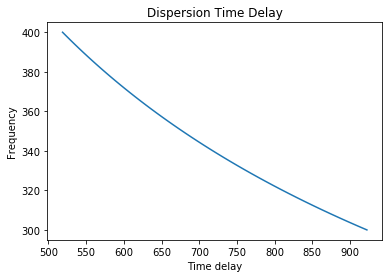

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t1 = 

f1 = np.linspace(300,400)
f2 = 400


t = (4.15*10**6)*((1/(f1**2))-(1/(f2**2)))*20

print(t)

plt.plot(t, f1)
plt.xlabel("Time delay")
plt.ylabel("Frequency")
plt.title("Dispersion Time Delay")
plt.show()

As the above example illustrates, we need to account for the dispersive delay if we want to detect pulsars, especially millisecond pulsars.  When searching for pulsars, we use a technique known as incoherent dedispersion.  This involves breaking the radio signal down into discrete radio frequency channels of finite width, and then subtracting the appropriate dispersive delay from each channel, thus aligning all of the pulses.  This does not completely remove the effects of dispersion, however, because individual radio frequency channels have a finite width, and so still suffer a small dispersive delay between the top and bottom of the channel.  This is often referred to as dispersive smearing.  We cannot remove this through incoherent dedispersion.

### Your task: Calculate the dispersive smearing for a pulsar observation.

Suppose we are observing a pulsar at a center frequency of 350 MHz using a bandwidth of 100 MHz broken down into 4096 individual frequency channels, with a sampling time of 81.92 microseconds.  The period of the pulsar is 3 ms and the DM is 20 pc/cm3.  We want to know the dispersive delay in the center frequency channel.

We will break this down into several parts.

1) What is the width of an individual frequency channel?




2) The formula for dispersive delay in a frequency channel of width $\Delta f \ll f$ is
$$ t_{\rm DM} = 8.3 \times 10^6\; \mathrm{ms} \times \mathrm{DM} \times \frac{\Delta f}{f^3} $$
(As an extra exercise, you can try to derive this from the formula for dispersive delay.  Hint: try using a Taylor expansion).
What is the dispersive smearing for this observing set up at the center frequency of 350 MHz?




3) How does this dispersive smearing compare to the pulsar period?  How does it compare to the sampling time used for this observation?




4) At what DM will the smearing time be 10% of the pulsar period?  At what DM will the smearing be equal to the sampling time?




5) What number of frequency channels would lead to a smearing time that is 10% of the pulsar period?


In [29]:
print(100/4096)

0


As you can see, dispersive smearing requires that we use large numbers of frequency channels if we want to retain sensitivity to fast pulsars.  Unfortunately, we can only measure the DM of a pulsar after we discover it.  So how do we find new pulsars, for which the DM is not known ahead of time?  The only way to do so is to de-disperse our data at many trial DMs and search the data for new pulsars, hoping we get lucky.  A trial DM is unlikely to match exactly the true DM of a new pulsar, so there will almost always be additional smearing from using a non-ideal trial DM.  For this reason, the step size between trial DMs must be small, so that the DM error is not too large.  This requires using many trial DMs, each of which must be searched independently, and that requires lots of computing power.

In PRESTO, di-dispersion is handled by one of two programs: prepsubband and prepdata.  prepsubband is more useful when creating many de-dispersed time series.  The following command was used to generate 10 de-dispersed time series for you to work with (normally it is typed out on one line):

```prepsubband -o guppi_55366_GBNCC16246_0087_0001 -numout 1458152 -lodm 17.75 -dmstep 0.1 -numdms 10 -mask guppi_55366_GBNCC16246_0087_0001_rfifind.mask guppi_55366_GBNCC16246_0087_0001.fits```

As before, the `-o` flag specifies the output file name and the last argument is the name of our raw data.  The `-numout` flag specifies the number of output data points, which  must be even for when we take the Fourier transform (more on this soon).  The `-lodm` flag specifies the lowest DM that we will create a time series for, `-dmstep` is the step size between DMs (both of these are in units of $\mathrm{pc\; cm^{-3}}$) and -numdms specifies the number of trial DMs to use.  The `-mask` flag specifies the RFI mask that will be applied to the data.

## Exploring a de-dispersed time series

A de-dispersed time series is created by subtracting the appropriate dispersive delay from each frequency channel, after which the frequency channels are added together, resulting in a record of the power detected by the telescope as a function of time.  You will explore one of the 10 time series created using the prepsubband command, as described above.

### Your Task: Explore a de-dispersed time series

Use the following command to get a graphical representation of a time series file:

In [17]:
! exploredat guppi_55366_GBNCC16246_0087_0001_DM17.75.dat



      Interactive Data Explorer
         by Scott M. Ransom
            November, 2001

 Button or Key            Effect
 -------------            ------
 Left Mouse or I or A     Zoom in  by a factor of 2
 Right Mouse or O or X    Zoom out by a factor of 2
 <                        Shift left  by a full screen width
 >                        Shift right by a full screen width
 ,                        Shift left  by 1/8 of the screen width
 .                        Shift right by 1/8 of the screen width
 +/_                      Increase/Decrease the top edge
 =/-                      Increase/Decrease the bottom edge
 SPACE                    Toggle statistics and sample plotting on/off
 M                        Toggle between median and average
 S                        Scale the powers automatically
 V                        Print the statistics for the current view
 P                        Print the current plot to a file
 G                        Go to a specified time
 ?     

You can use the following commands to zoom in/out, and move left and right in the file:

| Button or Key | Effect |
| :--- | :--- |
| Left Mouse or I or A | Zoom in  by a factor of 2 |
| Right Mouse or O or X | Zoom out by a factor of 2 |
| < | Shift left  by a full screen width | 
| > | Shift right by a full screen width |
| , | Shift left  by 1/8 of the screen width |
| . | Shift right by 1/8 of the screen width |
| ? | Show this help screen |
| Q | Quit |

Explore the data by zooming in and out, moving right (forward in time) or left (back in time), and noting the axis labels.  Write down anything you notice about the data, such as the general trend, abrupt changes, etc.  You already know that there is a pulsar in this data---do you see any pulses?  Does that surprise you?  What about this data confuses you?  What makes sense?  Take 5 minutes to think about these and other questions, and we will then discuss them as a group.


# The Fourier Transform 

Searching for a pulsar with unknown period in the time domain is very difficult.  Unless the pulsar is bright enough that individual pulses can be clearly identified (and most pulsars aren’t that bright), we would need to fold the data at a wide range of trial periods and look for a pulsar-like signal.  That is computationally intensive and only starting to be done efficiently in blind searches.  Most pulsars are found using a tool that is designed exactly for identifying periodic signals in complex data: the Fourier transform.

Entire college courses are taught on the Fourier transform.  Obviously, that is beyond the scope of this activity, so we will just touch on some of the basics.  The Fourier transform of a function $f(x)$ is defined as

$$ F(k) = \int\limits_{-\inf}^{+\inf}{f(x) e^{-2 \pi i x k} dx} $$

where $i$ is the imaginary number.  This is the definition of the Fourier transform for a continuous function, but in practice we work with discretely sampled data.  The discrete Fourier transform (DFT) is then defined as

$$ X_k = \sum_{n=0}^{N-1}{x_n e^{-2 \pi i k n/N}}$$

This may seem a little bit confusing, so it may make more sense if we take advantage of a pretty cool identity:

$$ e^{ix} = \cos{x} + i \sin{x} $$

This let’s us write the DFT as

$$ X_k = \sum_{n=0}^{N-1}{x_n \left[ \cos(2 \pi k n/N) - i \sin(2 \pi k n/N) \right]} $$

Let’s describe this in words.  It turns out that any function can be described as a sum of many (potentially infinite) sine and cosine functions, each with different frequencies and amplitudes.  The DFT of a function tells us the contribution of these sine and cosine functions at each possible frequency.  

As an example, suppose our data is noise free and contains a single cosine function with a frequency of exactly 2 Hz.  The DFT of this data would be zero at every frequency except 2 Hz, where we would see a spike in power.  The exception is at a frequency of 0 Hz.  Look at the above equation and see if you can figure out what the power would be at 0 Hz (Hint: this corresponds in the equation to $k = 0$).




Pulsar signals are not usually well described by a single sine or cosine.  Instead, they are better described by a repeating Gaussian function (this is the classic bell curve).  But a repeating Gaussian can be described by (in principle) an infinite sum of sine and cosine functions with different frequencies.  In practice, however, not all of these sines and cosines contribute significantly to the final Gaussian.  If a Gaussian has a width $\delta$, then it turns out that the number of sinusoids we need to adequately describe the function is proportional to $1/\delta$.  Furthermore, if the Gaussian repeats with a frequency of $f$, then these additional sinusoidal components will have frequencies of $2f$, $3f$, $4f$, $\dots$ . These higher frequency components are known as _harmonics_.

This is a lot to of information to digest!  So take a few minutes to discuss with your neighbor the preceding section, and ask some questions if you have them.

## Exploring a DFT of the Time Series

You will now take advantage of a PRESTO program to create DFTs of the de-dispersed time series.  Use the command

In [ ]:
! ls *.dat | xargs -L 1 realfft

We are employing a Linux trick by using the xargs command to feed the file names to realfft, because it cannot accept wildcards.  This will take an FFT of all the time series ending in `.dat` by using the Unix wildcard (`*`) .The FFT is an efficient way of taking the DFT.

### Your task: Explore the DFT of the time series

Use the command

In [ ]:
! explorefft guppi_55366_GBNCC16246_0087_0001_DM17.75.fft

Next, press the "`N`" key, followed by "`r`".  This will normalize the values by their raw power.  Now use the following commands to explore the file:

| Button or Key | Effect |
| :--- | :--- |
| Left Mouse or I| Zoom in  by a factor of 2 |
| Right Mouse or O | Zoom out by a factor of 2 |
| < | Shift left  by a full screen width |
| > | Shift right by a full screen width |
| , | Shift left  by 1/8 of the screen width |
| . | Shift right by 1/8 of the screen width |
| N | Re-normalize the powers by one of several methods |
| G | Go to a specified frequency |
| ? | Show this help screen |
| Q | Quit |

As with the time series, write down some general features of the DFT, looking at things like axis labels, trends, and frequencies that have a lot of power.  What do you notice about these frequencies?  What might be the source of some of these signals?  In our examples we discussed noiseless data, but our data has noise in it.  How does this affect the DFT?  What is the behavior of the DFT at very low frequencies (approaching 0 Hz)?  Write your observations in the space below.

## Searching a DFT for Pulsars

In principle, to find a pulsar, we need to look for the Fourier frequencies with significant power, fold the original data at those frequencies, and then determine if the signal is a pulsar or RFI.  In practice, there are some subtleties to consider.  For example, pulsars have significant Fourier power at their harmonic frequencies.  If we sum the potential harmonics, we can find weaker pulsars, but this requires some care.  We also want to find _binary pulsars_ whose apparent periods are changing due to Doppler acceleration during the course of an observation.  This spreads power out among different Fourier frequencies.  We need to account for this to find binary pulsars.  Luckily, tools exist that take these and other issues into consideration to produce a list of candidate pulsars.  One such tool is called `accelsearch`.  We will use it now.

### Your task: Use accelsearch to find candidate pulsars in the DFTs

Issue the command

In [ ]:
! ls *fft | xargs -L 1 accelsearch -zmax 0 -sigma 5.0

We are employing a Linux trick by using the xargs command to feed the file names to accelsearch, because it cannot accept wildcards.  The option `-zmax` says to search only for signals with a Fourier acceleration ($z$) of 0.  In other words, we will not be searching for binary pulsars right now.  Note that we are also cheating a bit here by ignoring everything with a significance (sigma value) less than 5.0, because we already know there is a strong pulsar in this data.  This just helps reduce the number of candidates you need to consider.

`accelsearch` creates several output files.  One group of files ends in `ACCEL_0`.  You can see these files by typing `ls`.

In [ ]:
! ls

These are text files that contain a list of the candidate pulsars found by accelsearch.  Use the following command to explore each file:

In [ ]:
! less -S <filename>

where you replace `<filename>` with the appropriate file.  You can then use the left, right, up, and down arrow keys to look at the list of candidate.  Focus on the top few rows, which are a summary of what was found.  What do you make of these candidates?  Do any look particularly interesting to you?



## Sifting and Folding

We have only searched 10 DMs, but typically we search 10s of thousands!  That produces a lot of candidates, some of which may be duplicated at different DMs, of marginal significance, or known RFI.  So we typically use some intelligent sifting algorithm to reduce the number of candidates that are actually interesting enough to fold, though that number can still be in the hundreds for a single observation.  This is a complication you should be aware of, but that we will not get into now.

Folding is a technique you have probably heard of before.  When we fold data, we divide it into segments that are each one rotation period long (for the purported rotation period of the candidate).  We then add these segments.  If there is a true periodic signal in the data, then whenever the signal is “on”, the correlated signal should increase linearly, but whenever the signal is “off”, the uncorrelated noise level should increase as the square root of the number of additions.  As such, we should see the ratio of signal and noise (not surprisingly called the signal-to-noise ratio, or SNR, or S/N) increase as $N/\sqrt{N} = \sqrt{N}$, and our signal should get stronger.  In this way we can see a pulsar whose individual pulses are actually lower than the noise level.

In PRESTO, folding is accomplished using the command `prepfold`.  The most important thing we need to know when folding a candidate is the period.  There are many ways to specify this in prepfold, but the simplest is using the `-p` option.

### Your task: Fold some of the candidates from your search

Examine the list of candidates for various trial DMs.  Choose some that you think might be pulsars, and examine the output files to find the period of the candidate.  Then issue the following command:

In [ ]:
! prepfold -p <period> <filename>

where you replace `<period>` with the candidate period in seconds and you replace `<filename>` with the filename of the de-dispersed time series that you want to fold (remember that you have many de-dispersed time series).

`prepfold` should work pretty quickly.  Examine the output plot.  Do you think this is candidate is an actual pulsar?  Ask one of the activity leaders for their opinion.

* Once you think you have identified the true pulsar in your data, go back to the output files from `accelsearch` and find the column labeled _sigma_.  This tells you the significance of the candidate.  Go through the output file from each trial DM, find the true pulsar in the list of candidates, and write down both the trial DM and the significance at that DM.




* Plot or make a rough sketch of DM vs significance in the space below.  If you are familiar with python or some other plotting tool, you can try making a more precise plot.




* Does this trend of DM vs significance make sense?  What would you estimate the true DM of the pulsar to be?




Now that you identified the the best DM of the pulsar, we will fold the full raw data file, retaining frequency information (remember that we summed over radio frequency when making the time series files).  Issue the following command:

In [ ]:
! prepfold -p <period> -dm <dm> guppi_55366_GBNCC16246_0087_0001.fits

This command will take a little longer to run.  Once it is done we will discuss the result and answer any other questions you have about the activity.  Nice work!

# Advanced Topic (For those who finish early): Measuring a TOA

The key to using pulsars to do great science lies in pulsar timing.  To do pulsar timing, we have to accurately measure a _pulse time of arrival_, or TOA.  This is the exact time (measured down to the nanosecond) when a pulse from a pulsar (or, to be more precise, when a particular reference point on the pulse from a pulsar) arrives at a telescope.

Conceptually, it is easiest to measure a TOA in the time domain.  If you can detect an individual pulse, you could just record the precise moment that you see, say, the peak of a pulse.  There are a few reasons why you might not want to take this simplistic approach, though.  What we really want to measure is _how many rotations a pulsar goes through_, which means we want to define a point in the profile that corresponds to a particular point in the magnetosphere of the pulsar, which we assume is stable over the long-term and tracks a particular point on the surface of the neutron star.  As it turns out, individual pulses can arrive at any time within a pulse window, corresponding to what we observe as the _average pulse profile_.  If individual pulses can come from different points in the pulse window, then they will not correspond to a definite point in the magnetosphere, and so will not be useful for pulsar timing.  Luckily, the average of many individual pulses is observed to be _very_ stable for _most_ pulsars, so if we add many individual pulses together, we can be confident that a particular point (say, the peak) of the average profile does in fact correspond to a constant point in the magnetosphere, and hence the surface of the neutron star.

So we will use an average profile.  We can do better still if we _cross-correlate_ this average profile with a standard profile that we think represents the ideal profile.  A cross-correlation will give us the offset between the observed and standard profile.  We can make a standard profile by fitting an analytic function to our data (a Gaussian curve, for example), or by using a very high S/N template made by summing many average profiles together, smoothed to get rid of noise in the data.  However you make it, cross-correlation between a standard and observed profile is the way to go.  But we can do even better if we perform this cross correlation in the Fourier domain (i.e., work with the Fourier transform of the observed and standard profiles).  The TOA precision that we can obtain using this Fourier cross-correlation technique is

$$ \sigma_{\rm TOA} \sim \frac{\delta}{\mathrm{S/N}} $$

where $\delta$ is the pulse width.  So bright, fast pulsars with narrow profiles give us the best TOA precision.

So let’s do it.  First, we need to refold the pulsar you found at the very best period and DM.  Use the following command to explore the “bestprof” file that was created for your earlier fold.  This contains the best measurement of the parameters for this pulsar:

In [ ]:
! cat guppi_55366_GBNCC16246_0087_0001_8.85ms_Cand.pfd.bestprof

Look at the entries, and find those labeled "`Best DM`" and "`P_bary (ms)`".  Now refold the data using the following command:

In [ ]:
! prepfold -nosearch -p <period> -dm <dm> guppi_55366_GBNCC16246_0087_0001.fits

and replace `<period>` and `<dm>` with the values from the `bestprof` file.  Be careful: prepfold expects the period in seconds but the bestprof file gives the period in milliseconds!  The `-nosearch` flag tells prepfold not to do any optimization of the period or DM.

Next, we will create the standard template by fitting a Gaussian to the observed profile.  Issue the following command:

In [ ]:
! pygaussfit.py guppi_55366_GBNCC16246_0087_0001_8.85ms_Cand.pfd.bestprof

This will bring up an interactive window.  Use your mouse to draw a box around the profile with a height and width roughly equal to the height and width of the pulse.  This will define a starting guess for the Gaussian we want to fit.  Next, press the middle mouse button, and a fit will automatically be performed.  The bottom window will give the difference between the fit and the observed data (called the residuals).  This should look more or less random.  One Gaussian should be enough to fit the profile of this pulsar, but in principle we could use more.

Now look at your terminal window.  `pygaussift.py` reports the best fit parameters.  Copy everything in between the two shorter dashed lines (starting with “const =”) and paste this into a file named `gaussians.txt`.  Close the `pygaussfit.py` window.

This will bring up an interactive window.  Use your mouse to draw a box around the profile with a height and width roughly equal to the height and width of the pulse.  This will define a starting guess for the Gaussian we want to fit.  Next, press the middle mouse button, and a fit will automatically be performed.  The bottom window will give the difference between the fit and the observed data (called the residuals).  This should look more or less random.  One Gaussian should be enough to fit the profile of this pulsar, but in principle we could use more.

Now look at your terminal window.  pygaussift.py reports the best fit parameters.  Copy everything in between the two shorter dashed lines (starting with “const =”) and paste this into a file named gaussians.txt.  Close the pygaussfit.py window.

In [ ]:
! get_TOAs.py -g gaussians.txt -n 4 -d <dm> guppi_55366_GBNCC16246_0087_0001_8.85ms_Cand.pfd

The `-g` option specifies the file containing our Gaussian fit parameters.  The `-n` option specifies the number of TOAs to calculate.  The `-d` option specifies the DM (use the best DM from your fold).  The last argument is the name of the "`pfd`" file, which contains all the information about the folded pulsar.

The output from get_TOAs.py should look something like this:
```
1                350.012 55366.9184227579756     9.96
1                350.012 55366.9186713567407     9.08
1                350.012 55366.9189198526740    10.82
1                350.012 55366.9191684513097    10.20
```

The first column is a code specifying the telescope used for the observation (1 = GBT).  The second column is the frequency corresponding to this TOA (in this case, the center frequency used for the observation).  The third column is the actual TOA measured in MJD (modified Julian date).  The last column is the uncertainty in the TOA measurement in microseconds (one millionth of a second).  

This is the data you would give to a program like `TEMPO` if you wanted to time a pulsar.